**Muzaffer Estelik**

**GTID :** 903473214

estelik.muzaffer@gatech.edu

**Supervised Learning**

**Heart Disease UCI**

**source : https://www.kaggle.com/ronitf/heart-disease-uci**

### INTRODUCTION

The purpose of this project is to explore some techniques in supervised learning. It is important to realize that understanding an algorithm or technique requires understanding how it behaves under a variety of circumstances. As such, you will be asked to "implement" some simple learning algorithms (for sufficiently small values of implement, meaning I don't really want you to implement anything at all), and to compare their performance.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

I'll be implementing five learning algorithms. They are:
* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, recall_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time

from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)

%matplotlib inline

In [28]:
data=pd.read_csv('heart.csv')

In [29]:
data.shape

(303, 14)

In [30]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


It's good to have all my feature numeric. There's no need to make any encoding. But I'll definitely need scaling. Before that, I want to see the correlation between the features including the target.

In [33]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


To make it easier to understand, I'll plot it with a heat map.

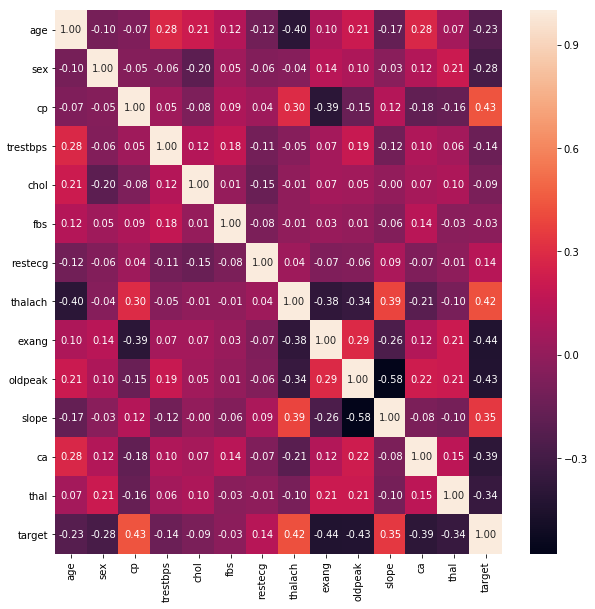

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f');

According to the heatmap, we can say that there's no dominant feature and the target variable has some positive and negative correlation (max:0.44) with the features. 

In [35]:
# Splitting the target feature
X=data.drop('target',axis=1)
y=data['target']

In [36]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [37]:
#Splitting the data into train and test sets as 80% for train and the remaining 20% for test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [38]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (257, 13)
y_train shape: (257,)
X_test shape: (46, 13)
y_test shape: (46,)


In [39]:
#Normalizing
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
#dt_clf = DecisionTreeClassifier()

#param_grid = {
#                'max_depth': [2, 3, 4, 5, 6],
#                'criterion': ['gini','entropy'],
#                'splitter' : ['best','random'],
#                'min_samples_split' : [2, 3, 4],
#                'min_samples_leaf' :[1, 2, 3],
#                'min_weight_fraction_leaf' : [0.0,0.01,0.02,0.03,0.04],
#                'max_features':[None, 'auto', 'sqrt', 'log2'],
#                'min_impurity_decrease' : [0.0, 0.02, 0.05]
                #'ccp_alpha' : [0.0, 0.001]
#             }

#grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True, n_jobs=-1)

#grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3], 'min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.03, 0.04], 'max_features': [None, 'auto', 'sqrt', 'log2'], 'min_impurity_decrease': [0.0, 0.02, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [42]:
#grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_impurity_decrease': 0.02,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.04,
 'splitter': 'best'}

In [43]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='auto',
                                min_impurity_decrease= 0.0, min_samples_leaf= 2, min_samples_split= 4,
                                 min_weight_fraction_leaf= 0.04, splitter= 'best')

In [44]:
process_times=[]
start_time = time.time()
dt_clf.fit(X_train, y_train)
end_time = time.time()
dt_time = end_time - start_time
print(f"Model process time: {dt_time}")
process_times.append(dt_time)

Model process time: 0.003999471664428711


In [45]:
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

In [46]:
dt_train_recall_score = recall_score(y_train, y_pred_train)
dt_test_recall_score = recall_score(y_test, y_pred_test)

In [47]:
print('Train Recall score: {}'
      .format(dt_train_recall_score))
print('Test Recall score: {}'
      .format(dt_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.9051094890510949
Test Recall score: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.91      0.71      0.80        28

   micro avg       0.78      0.78      0.78        46
   macro avg       0.79      0.80      0.78        46
weighted avg       0.81      0.78      0.79        46

[[16  2]
 [ 8 20]]


In [48]:
dt_clf.feature_importances_

array([0.05800398, 0.        , 0.17372043, 0.01958467, 0.03064881,
       0.        , 0.        , 0.        , 0.10212811, 0.11947194,
       0.        , 0.        , 0.49644204])

In [49]:
from sklearn import tree
from sklearn.model_selection import ShuffleSplit


In [50]:
feature_importances = dict(zip(X.columns, dt_clf.feature_importances_))
top_fifteen = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)[:15]

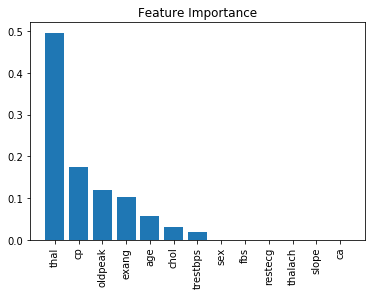

In [51]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(len(top_fifteen)), [f[1] for f in top_fifteen])
plt.xticks(range(len(top_fifteen)), [f[0] for f in top_fifteen], rotation=90)
plt.show()

In [54]:
def plot_validation_curve(estimator, title, X, y, param, param_range, cv=5,ylim=None, scoring="recall", list=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(param)
    plt.ylabel("Recall Score")

    train_scores, valid_scores = validation_curve(estimator, X, y, param,param_range,cv = cv, scoring = scoring)
    train_scores_mean = train_scores.mean(axis = 1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = valid_scores.mean(axis = 1)
    test_scores_std = np.std(valid_scores, axis=1)
    plt.grid()
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g",
             label="Cross-validation Score")

    plt.legend(loc="best")
    plt.show()
    return [train_scores_mean,test_scores_mean ]

In [55]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='auto',
                                min_impurity_decrease= 0.0, min_samples_leaf= 2, min_samples_split= 4,
                                 min_weight_fraction_leaf= 0.04, splitter= 'best')

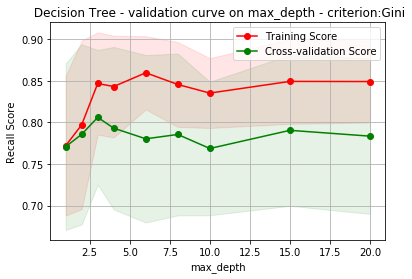

In [56]:
max_depths = [1, 2, 3, 4, 6, 8, 10, 15, 20]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on max_depth - criterion:Gini', X,
                                    y, 'max_depth', max_depths, cv=cv)

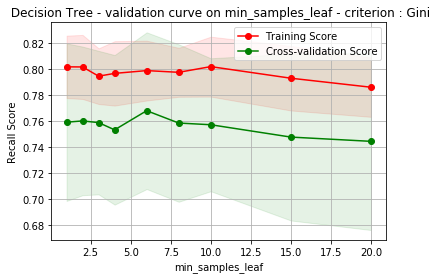

In [57]:
min_samples_leaf = [1, 2, 3, 4, 6, 8, 10, 15, 20]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on min_samples_leaf - criterion : Gini', X,
                                    y, 'min_samples_leaf', min_samples_leaf, scoring=None, cv=cv)

In [58]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                                min_impurity_decrease= 0.0, min_samples_leaf= 2, min_samples_split= 4,
                                 min_weight_fraction_leaf= 0.04, splitter= 'best')

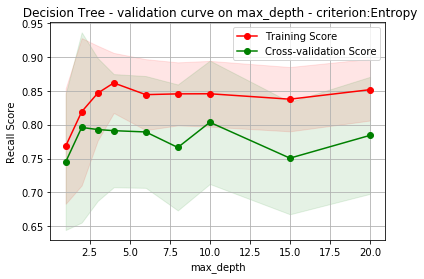

In [59]:
max_depths = [1, 2, 3, 4, 6, 8, 10, 15, 20]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on max_depth - criterion:Entropy', X,
                                    y, 'max_depth', max_depths, cv=cv)

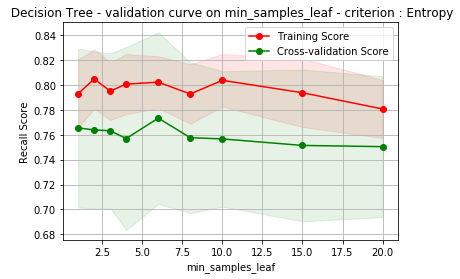

In [60]:
min_samples_leaf = [1, 2, 3, 4, 6, 8, 10, 15, 20]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(dt_clf, ' Decision Tree - validation curve on min_samples_leaf - criterion : Entropy', X,
                                    y, 'min_samples_leaf', min_samples_leaf, scoring=None, cv=cv)

In [61]:
#grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_impurity_decrease': 0.02,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.04,
 'splitter': 'best'}

In [62]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='auto',
                                min_impurity_decrease= 0.0, min_samples_leaf= 2, min_samples_split= 4,
                                 min_weight_fraction_leaf= 0.04, splitter= 'best')

### Boosting

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
adaboost_clf = AdaBoostClassifier(base_estimator = dt_clf)

In [65]:
#param_grid = {
#                'n_estimators': [36,35,36],
#                'learning_rate': [0.22,0.23,0.24],
#                'algorithm' : ['SAMME','SAMME.R'],
             }

#grid_search = GridSearchCV(adaboost_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True, n_jobs=-1)

#grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.04, presort=False,
            random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [36, 35, 36], 'learning_rate': [0.22, 0.23, 0.24], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [66]:
#grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.23, 'n_estimators': 36}

In [67]:
adaboost_clf = AdaBoostClassifier(base_estimator = dt_clf, algorithm='SAMME', learning_rate=0.23, n_estimators=35)

In [68]:
start_time = time.time()
adaboost_clf.fit(X_train, y_train)
end_time = time.time()
Boost_time = end_time - start_time
print(f"Model process time: {Boost_time}")
process_times.append(Boost_time)

Model process time: 0.187058687210083


In [69]:
y_pred_train = adaboost_clf.predict(X_train)
y_pred_test = adaboost_clf.predict(X_test)

In [70]:
adaboost_train_recall_score = recall_score(y_train, y_pred_train)
adaboost_test_recall_score = recall_score(y_test, y_pred_test)

In [71]:
print('Train Recall score: {}'
      .format(adaboost_train_recall_score))
print('Test Recall score: {}'
      .format(adaboost_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.948905109489051
Test Recall score: 0.8214285714285714
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.85      0.82      0.84        28

   micro avg       0.80      0.80      0.80        46
   macro avg       0.79      0.80      0.80        46
weighted avg       0.81      0.80      0.81        46

[[14  4]
 [ 5 23]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:580: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:164: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:579: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
C:\ProgramData\Anac

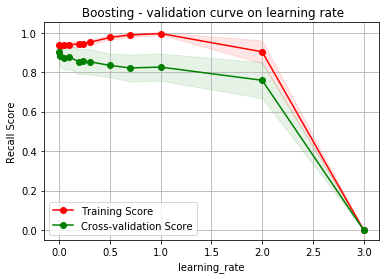

In [72]:
learning_rates = [0.001,0.01,0.05,0.1,0.2,0.23,0.3,0.5,0.7,1,2,3]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(adaboost_clf, ' Boosting - validation curve on learning rate', X,
                                    y, 'learning_rate', learning_rates, cv=cv)

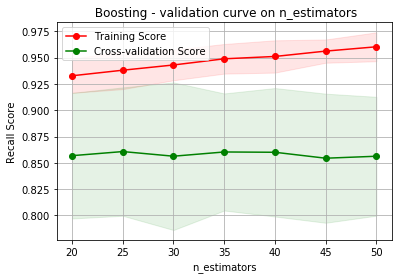

In [73]:
n_estimators = [20,25,30,35,40,45,50]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(adaboost_clf, ' Boosting - validation curve on n_estimators', X,
                                    y, 'n_estimators', n_estimators, cv=cv)

### Support Vector Machines

In [74]:
from sklearn.svm import LinearSVC, SVC

In [75]:
LSVC_clf = LinearSVC()

In [76]:
#param_grid = {
#                #'penalty': ['l1','l2'],
#                #'loss' : ['hinge','squared_hinge'],
#                'dual':[True, False],
#                'tol':[0.097,0.098,0.0099],
#                'C': [2,3.7,3.8,4],
#                'fit_intercept': [True, False]
#              }

In [77]:
#grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
#grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'dual': [True, False], 'tol': [0.097, 0.098, 0.0099], 'C': [2, 3.7, 3.8, 4], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [78]:
#grid_search.best_params_

{'C': 3.7, 'dual': True, 'fit_intercept': True, 'tol': 0.097}

In [79]:
LSVC_clf = LinearSVC(C=3, dual=True, fit_intercept=True, tol=0.097)

In [80]:
start_time = time.time()
LSVC_clf.fit(X_train, y_train)
end_time = time.time()
LSVC_time = end_time - start_time
print(f"Model process time: {LSVC_time}")
process_times.append(LSVC_time)

Model process time: 0.009004354476928711


In [81]:
y_pred_train = LSVC_clf.predict(X_train)
y_pred_test = LSVC_clf.predict(X_test)

In [82]:
LSVC_train_recall_score = recall_score(y_train, y_pred_train)
LSVC_test_recall_score = recall_score(y_test, y_pred_test)

In [83]:
print('Train Recall score: {}'
      .format(LSVC_train_recall_score))
print('Test Recall score: {}'
      .format(LSVC_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.9051094890510949
Test Recall score: 0.8928571428571429
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.89      0.89        28

   micro avg       0.87      0.87      0.87        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46

[[15  3]
 [ 3 25]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

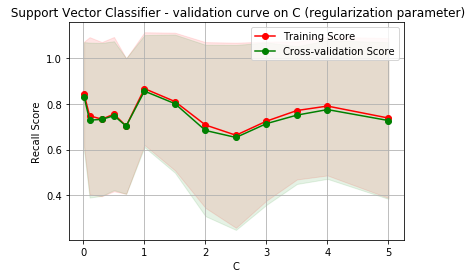

In [84]:
C = [0.01,0.1,0.3,0.5,0.7,1,1.5,2,2.5,3,3.5,4,5]
LSVC_clf = LinearSVC(C=3.8, dual=True, fit_intercept=True, tol=0.097)

# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(LSVC_clf, ' Support Vector Classifier - validation curve on C (regularization parameter)', X,
                                    y, 'C', C, cv=cv)

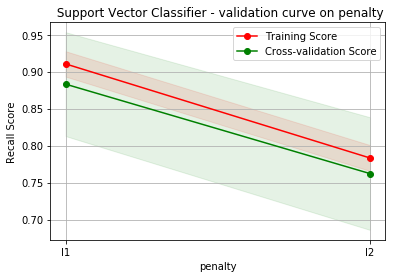

In [85]:
LSVC_clf = LinearSVC(C=3, dual=False, fit_intercept=True, tol=0.097)
penalty = ['l1','l2']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(LSVC_clf, ' Support Vector Classifier - validation curve on penalty', X,
                                    y, 'penalty', penalty, cv=cv)

### Kernelized SVC

In [86]:
KSVC_clf = SVC()

In [87]:
#param_grid = {
#                #'kernel': ['rbf','poly','sigmoid'],
#                #'kernel': ['rbf','sigmoid'],
#                'kernel': ['sigmoid'],
#                'degree':[0.0001,0.0005,0.0008],
#                'gamma' : ['scale','auto'],
#                'C': [1.4,1.45,1.50],
#                'shrinking':[True,False],
#                'tol':[0.011,0.015,0.016]
#              }

In [88]:
#grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
#grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['sigmoid'], 'degree': [0.0001, 0.0005, 0.0008], 'gamma': ['scale', 'auto'], 'C': [1.4, 1.45, 1.5], 'shrinking': [True, False], 'tol': [0.011, 0.015, 0.016]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [89]:
#grid_search.best_params_

{'C': 1.45,
 'degree': 0.0001,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'shrinking': True,
 'tol': 0.015}

In [90]:
KSVC_clf = SVC(C=1.7, degree=1, gamma='auto',kernel='poly',shrinking=True,tol=0.065)

In [91]:
start_time = time.time()
KSVC_clf.fit(X_train, y_train)
end_time = time.time()
KSVC_time = end_time - start_time
print(f"Model process time: {KSVC_time}")
process_times.append(KSVC_time)

Model process time: 0.009001493453979492


In [92]:
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [93]:
KSVC_train_recall_score = recall_score(y_train, y_pred_train)
KSVC_test_recall_score = recall_score(y_test, y_pred_test)

In [94]:
print('Train Recall score: {}'
      .format(KSVC_train_recall_score))
print('Test Recall score: {}'
      .format(KSVC_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.8978102189781022
Test Recall score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.89      0.86      0.87        28

   micro avg       0.85      0.85      0.85        46
   macro avg       0.84      0.85      0.84        46
weighted avg       0.85      0.85      0.85        46

[[15  3]
 [ 4 24]]


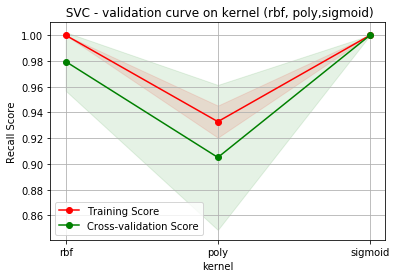

In [95]:
kernel= ['rbf','poly','sigmoid']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC - validation curve on kernel (rbf, poly,sigmoid)', X,
                                    y, 'kernel', kernel, cv=cv)

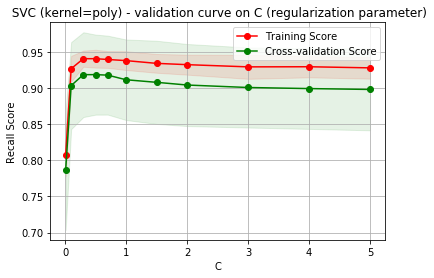

In [96]:
C = [0.01,0.1,0.3,0.5,0.7,1,1.5,2,3,4,5]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC (kernel=poly) - validation curve on C (regularization parameter)', X,
                                    y, 'C', C, cv=cv)

In [97]:
KSVC_clf = SVC(C=1.4, degree=0.01, gamma='scale',kernel='rbf',shrinking=True,tol=0.02)

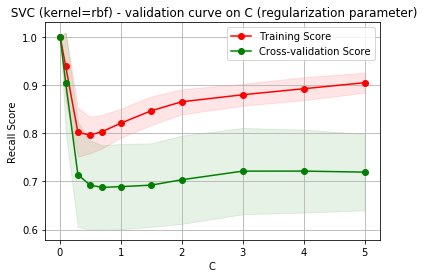

In [98]:
C = [0.01,0.1,0.3,0.5,0.7,1,1.5,2,3,4,5]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC (kernel=rbf) - validation curve on C (regularization parameter)', X,
                                    y, 'C', C, cv=cv)

In [99]:
KSVC_clf = SVC(C=1.45, degree=0.0001, gamma='scale',kernel='sigmoid',shrinking=True,tol=0.015)

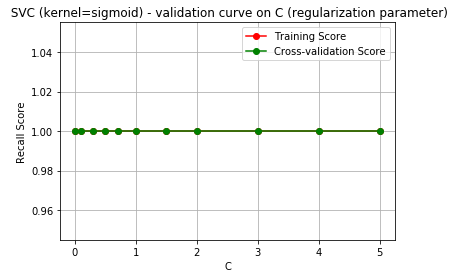

In [100]:
C = [0.01,0.1,0.3,0.5,0.7,1,1.5,2,3,4,5]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(KSVC_clf, ' SVC (kernel=sigmoid) - validation curve on C (regularization parameter)', X,
                                    y, 'C', C, cv=cv)

In [101]:
KSVC_clf = SVC(C=1.7, degree=1, gamma='auto',kernel='sigmoid',shrinking=True,tol=0.065)

In [102]:
KSVC_clf.fit(X_train, y_train)

SVC(C=1.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.065, verbose=False)

In [103]:
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [104]:
KSVC_train_recall_score = recall_score(y_train, y_pred_train)
KSVC_test_recall_score = recall_score(y_test, y_pred_test)

In [105]:
print('Train Recall score: {}'
      .format(KSVC_train_recall_score))
print('Test Recall score: {}'
      .format(KSVC_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.8905109489051095
Test Recall score: 0.8214285714285714
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.88      0.82      0.85        28

   micro avg       0.83      0.83      0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46

[[15  3]
 [ 5 23]]


### k-Nearest Neighbors

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn_clf = KNeighborsClassifier()

In [108]:
param_grid = {
                'n_neighbors' : [4,5,6],
                'weights' : ['uniform', 'distance'],
                'algorithm': ['ball_tree','kd_tree','brute','auto'],
                'leaf_size':[1,2,3]    
            }

In [109]:
#grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'recall_weighted', return_train_score=True)

In [110]:
#grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [4, 5, 6], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 'leaf_size': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [111]:
#grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 5,
 'weights': 'uniform'}

In [112]:
knn_clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=5,n_jobs=-1,weights='uniform')

In [113]:
start_time = time.time()
knn_clf.fit(X_train,y_train)
end_time = time.time()
knn_time = end_time - start_time
print(f"Model process time: {knn_time}")
process_times.append(knn_time)

Model process time: 0.004998922348022461


In [114]:
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

In [115]:
knn_train_recall_score = recall_score(y_train, y_pred_train)
knn_test_recall_score = recall_score(y_test, y_pred_test)

In [116]:
print('Train Recall score: {}'
      .format(knn_train_recall_score))
print('Test Recall score: {}'
      .format(knn_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.8832116788321168
Test Recall score: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        18
           1       0.83      0.71      0.77        28

   micro avg       0.74      0.74      0.74        46
   macro avg       0.73      0.75      0.73        46
weighted avg       0.76      0.74      0.74        46

[[14  4]
 [ 8 20]]


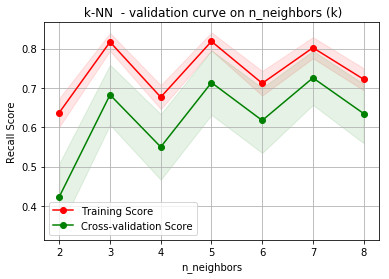

In [117]:
n_neighbors = [2,3,4,5,6,7,8]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on n_neighbors (k)', X,
                                    y, 'n_neighbors', n_neighbors, cv=cv)

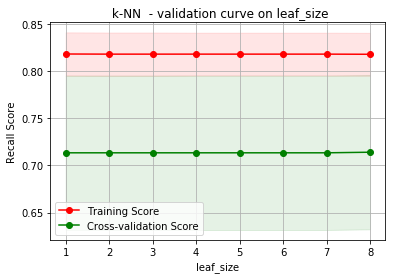

In [118]:
leaf_size = [1,2,3,4,5,6,7,8]
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on leaf_size', X,
                                    y, 'leaf_size', leaf_size, cv=cv)

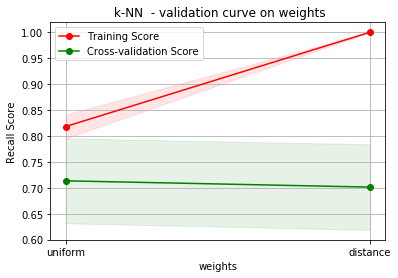

In [119]:
weights= ['uniform', 'distance']

# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on weights', X,
                                    y, 'weights', weights, cv=cv)

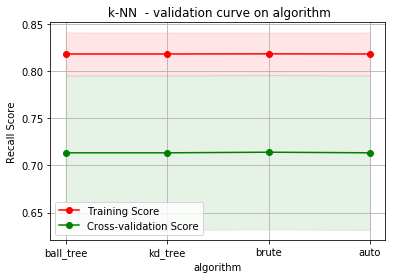

In [120]:
algorithm=['ball_tree','kd_tree','brute','auto']

# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(knn_clf, ' k-NN  - validation curve on algorithm', X,
                                    y, 'algorithm', algorithm, cv=cv)

### Neural Networks

In [121]:
from sklearn.neural_network import MLPClassifier

In [122]:
d = X_train.shape[1]

In [123]:
param_grid = {'hidden_layer_sizes'  : [(8,), (16,), (32,), (64,),(100,),(128,)],
              'activation': ['relu', 'logistic','identity','tanh'],
              'solver':['lbfgs','sgd','adam'],
              'alpha': [0.005, 0.001,0.0001],
              'learning_rate':['constant','invscaling','adaptive'],
              'learning_rate_init': sorted([(2**x)/500.0 for x in range(4)]+[0.000001])
             }


In [124]:
nnclf = MLPClassifier(max_iter=500, early_stopping=True)

In [125]:
#grid_search = GridSearchCV(nnclf, param_grid, cv=kFold,scoring = 'recall_weighted', return_train_score=True, n_jobs=-1)

In [126]:
#grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (100,), (128,)], 'activation': ['relu', 'logistic', 'identity', 'tanh'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.005, 0.001, 0.0001], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [1e-06, 0.002, 0.004, 0.008, 0.016]},
       pre_dispatch='2*n_jobs', re

In [127]:
#grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (128,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.008,
 'solver': 'adam'}

In [128]:
nnclf = MLPClassifier(max_iter=500, early_stopping=True, activation='identity', alpha=0.005, hidden_layer_sizes=(64,),
                      learning_rate='adaptive', learning_rate_init=0.016, solver='adam')

In [129]:
start_time = time.time()
nnclf.fit(X_train,y_train)
end_time = time.time()
nn_time = end_time - start_time
print(f"Model process time: {nn_time}")
process_times.append(nn_time)

Model process time: 0.05652642250061035


In [130]:
y_pred_train = nnclf.predict(X_train)
y_pred_test = nnclf.predict(X_test)

In [131]:
nn_train_recall_score = recall_score(y_train, y_pred_train)
nn_test_recall_score = recall_score(y_test, y_pred_test)

In [132]:
print('Train Recall score: {}'
      .format(nn_train_recall_score))
print('Test Recall score: {}'
      .format(nn_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.8248175182481752
Test Recall score: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.88      0.79      0.83        28

   micro avg       0.80      0.80      0.80        46
   macro avg       0.80      0.81      0.80        46
weighted avg       0.82      0.80      0.81        46

[[15  3]
 [ 6 22]]


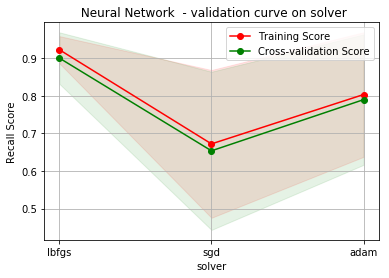

In [133]:
solver = ['lbfgs','sgd','adam']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(nnclf, ' Neural Network  - validation curve on solver', X,
                                    y, 'solver', solver, cv=cv)

In [134]:
nnclf = MLPClassifier(max_iter=500, early_stopping=True, activation='identity', alpha=0.005, hidden_layer_sizes=(64,),
                      learning_rate='adaptive', learning_rate_init=0.016, solver='lbfgs')
nnclf.fit(X_train,y_train)
y_pred_train = nnclf.predict(X_train)
y_pred_test = nnclf.predict(X_test)
nn_train_recall_score = recall_score(y_train, y_pred_train)
nn_test_recall_score = recall_score(y_test, y_pred_test)
print('Train Recall score: {}'
      .format(nn_train_recall_score))
print('Test Recall score: {}'
      .format(nn_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.9051094890510949
Test Recall score: 0.8928571428571429
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.89      0.89        28

   micro avg       0.87      0.87      0.87        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46

[[15  3]
 [ 3 25]]


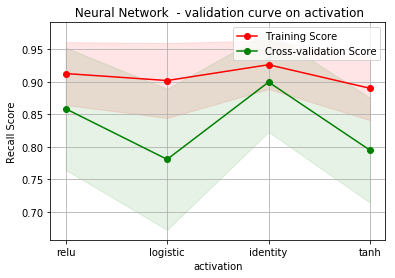

In [135]:
activation = ['relu', 'logistic','identity','tanh']
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
res_val = plot_validation_curve(nnclf, ' Neural Network  - validation curve on activation', X,
                                    y, 'activation', activation, cv=cv)

In [136]:
nnclf = MLPClassifier(max_iter=1000, early_stopping=True, activation='identity', alpha=0.005, hidden_layer_sizes=(64,),
                      learning_rate='adaptive', learning_rate_init=0.016, solver='lbfgs')

In [137]:
nnclf.fit(X_train,y_train)

Model process time: 0.04099678993225098


In [138]:
y_pred_train = nnclf.predict(X_train)
y_pred_test = nnclf.predict(X_test)
nn_train_recall_score = recall_score(y_train, y_pred_train)
nn_test_recall_score = recall_score(y_test, y_pred_test)
print('Train Recall score: {}'
      .format(nn_train_recall_score))
print('Test Recall score: {}'
      .format(nn_test_recall_score))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Train Recall score: 0.9051094890510949
Test Recall score: 0.8928571428571429
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.89      0.89        28

   micro avg       0.87      0.87      0.87        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46

[[15  3]
 [ 3 25]]


In [139]:
models = ["Tree","Boosting","Linear-SVC","Kernelized SVC", "k-NN", "Neural Network"]

In [149]:
process_times_dict = dict(zip(models,process_times))

In [150]:
process_times_dict

{'Tree': 0.003999471664428711,
 'Boosting': 0.187058687210083,
 'Linear-SVC': 0.009004354476928711,
 'Kernelized SVC': 0.009001493453979492,
 'k-NN': 0.004998922348022461,
 'Neural Network': 0.05652642250061035}

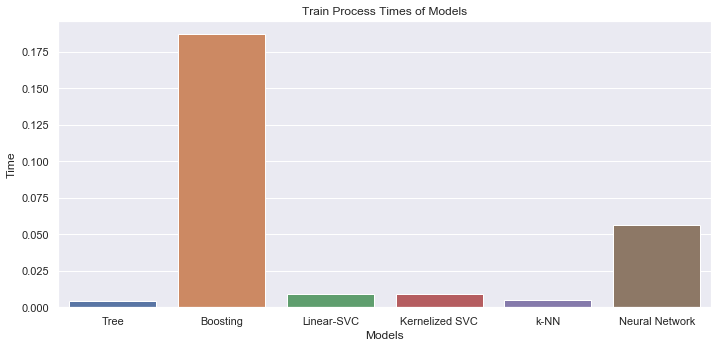

In [151]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.barplot(models, process_times)
plt.title("Train Process Times of Models")
plt.xlabel('Models')
plt.ylabel("Time");

In [152]:
process_times_dict

{'Tree': 0.003999471664428711,
 'Boosting': 0.187058687210083,
 'Linear-SVC': 0.009004354476928711,
 'Kernelized SVC': 0.009001493453979492,
 'k-NN': 0.004998922348022461,
 'Neural Network': 0.05652642250061035}

In [153]:
train_recall_scores = [dt_train_recall_score, adaboost_train_recall_score, LSVC_train_recall_score, KSVC_train_recall_score, 
                       knn_train_recall_score, nn_train_recall_score]
test_recall_scores = [dt_test_recall_score, adaboost_test_recall_score, LSVC_test_recall_score, KSVC_test_recall_score, 
                      knn_test_recall_score, nn_test_recall_score]

In [154]:
for_plot = pd.DataFrame ([train_recall_scores, test_recall_scores], columns=models, index=['Train Recall Score', 'Test Recall Score'])
for_plot=for_plot.T

In [155]:
for_plot

,Train Recall Score,Test Recall Score
Tree,0.905109,0.714286
Boosting,0.948905,0.821429
Linear-SVC,0.905109,0.892857
Kernelized SVC,0.890511,0.821429
k-NN,0.883212,0.714286
Neural Network,0.905109,0.892857


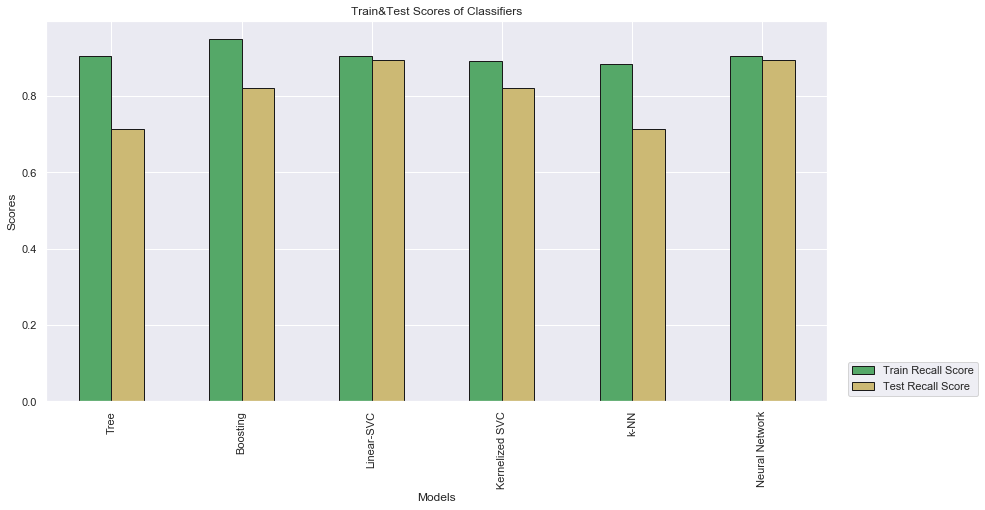

In [156]:
for_plot.plot(kind='bar', figsize=(14,7), color='gykc',  edgecolor='k')

plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();